In [1]:
from active_coresets.quantum_algorithms import RQBM
from active_coresets.coreset_algorithms import bayesian_inference
from active_coresets.classical_algorithms import GIGACoreset
from active_coresets.data_structures import Model, Coreset
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from typing import List

In [2]:
class RQBMModel(Model):
    def __init__(self, rqbm: RQBM, beta: float):
        self.rqbm = rqbm
        self.beta = beta
        self.model_dist = self.rqbm.get_distribution(self.beta)
    
    def evaluate_on_coreset(self, coreset: Coreset) -> float:
        return 0.0

    def evaluate_on_point(self, data: np.ndarray, probability: float) -> float:
        converted_data = -2 * data + np.ones(data.shape[0])
        model_probability = self.model_dist[tuple(converted_data)]
        return 1 - probability * np.log(probability / model_probability)

In [3]:
def RQBM_loglikelihood(data: np.ndarray, models: List[RQBMModel]) -> np.ndarray:
    data_dict = {}
    for pt in data:
        tup_pt = tuple(pt)
        if tup_pt in data_dict:
            data_dict[tup_pt] += 1
        else:
            data_dict[tup_pt] = 1
    data_dist = {k: v / sum(data_dict.values()) for k, v in data_dict.items()}

    ll_vecs = np.zeros((data.shape[0], len(models)))
    for i in range(data.shape[0]):
        for j in range(len(models)):
            ll_vecs[i][j] = models[j].evaluate_on_point(data[i], data_dist[tuple(data[i])])
    return ll_vecs

In [4]:
def plot_loss_history(loss_history: List[float]):
    plt.plot(loss_history)
    plt.show()

In [5]:
def make_model(rqbm, beta) -> RQBMModel:
    return RQBMModel(rqbm, beta)

In [6]:
dataset = np.array([np.random.randint(0, 2, size=4) for _ in range(100)])


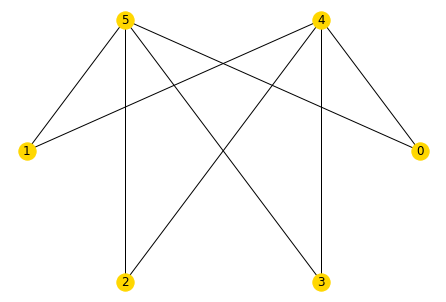

In [7]:
visible = [0, 1, 2, 3]
hidden = [4, 5]
edges = [(i, j) for i in visible for j in hidden]

G = nx.Graph()
G.add_edges_from(edges)
nx.draw_circular(G, with_labels=True, node_color='gold')

beta = 10.0

In [19]:
import importlib
import active_coresets
importlib.reload(active_coresets.quantum_algorithms)
importlib.reload(active_coresets.classical_algorithms)
importlib.reload(active_coresets.coreset_algorithms)
importlib.reload(active_coresets.QBM)
from active_coresets.quantum_algorithms import RQBM
from active_coresets.coreset_algorithms import bayesian_inference
import active_coresets.QBM
from active_coresets.QBM import QuantumBoltzmannMachine

[]
Model dist: {(1, 1, 1, 1): (0.04667219874378749+0j), (1, 1, 1, -1): (0.02328478920417071+0j), (1, 1, -1, 1): (0.07120204529630642+0j), (1, 1, -1, -1): (0.027914927684793145+0j), (1, -1, 1, 1): (0.04519028325934159+0j), (1, -1, 1, -1): (0.02237717243267891+0j), (1, -1, -1, 1): (0.060032897893730376+0j), (1, -1, -1, -1): (0.023026765873797782+0j), (-1, 1, 1, 1): (0.10198957585024275+0j), (-1, 1, 1, -1): (0.06666312875603703+0j), (-1, 1, -1, 1): (0.125755687823472+0j), (-1, 1, -1, -1): (0.06521593185879594+0j), (-1, -1, 1, 1): (0.09815234130857953+0j), (-1, -1, 1, -1): (0.0647252443069448+0j), (-1, -1, -1, 1): (0.10402603051387734+0j), (-1, -1, -1, -1): (0.053770979193444306+0j)}
Data dist: {}
Coreset: []


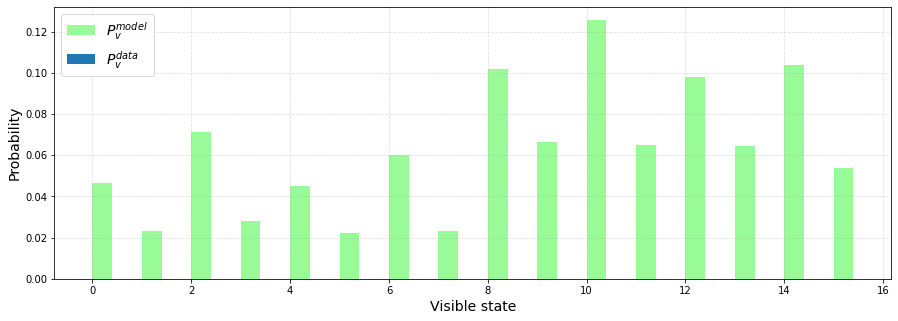

/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


[(103.57427701861384, array([0, 0, 0, 1]))]
Model dist: {(1, 1, 1, 1): (0.028694573569634764+0j), (1, 1, 1, -1): (0.8744865170683273+0j), (1, 1, -1, 1): (0.00098886613219888+0j), (1, 1, -1, -1): (0.028520926998941883+0j), (1, -1, 1, 1): (0.0010577368871588896+0j), (1, -1, 1, -1): (0.031065302513852505+0j), (1, -1, -1, 1): (3.924155426849914e-05+0j), (1, -1, -1, -1): (0.0010426314150480305+0j), (-1, 1, 1, 1): (0.0010708472523169067+0j), (-1, 1, 1, -1): (0.030724296649286272+0j), (-1, 1, -1, 1): (4.2279431187794094e-05+0j), (-1, 1, -1, -1): (0.0010526255370278434+0j), (-1, -1, 1, 1): (4.3015373021710255e-05+0j), (-1, -1, 1, -1): (0.0011274580217814547+0j), (-1, -1, -1, 1): (2.149295293660323e-06+0j), (-1, -1, -1, -1): (4.153230065390201e-05+0j)}
Data dist: {(1.0, 1.0, 1.0, -1.0): 1.0}
Coreset: [(103.57427701861384, array([0, 0, 0, 1]))]


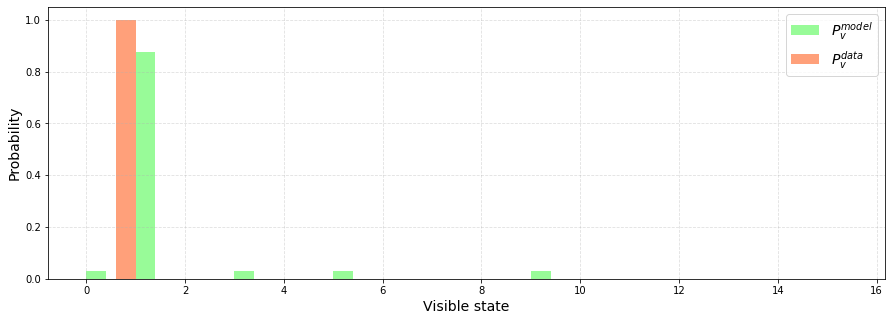

[(103.57427701861384, array([0, 0, 0, 1]))]
Model dist: {(1, 1, 1, 1): (0.030499231340817463+0j), (1, 1, 1, -1): (0.8757710012970155+0j), (1, 1, -1, 1): (0.0011335601090590305+0j), (1, 1, -1, -1): (0.03182869141449522+0j), (1, -1, 1, 1): (0.0011008737909056307+0j), (1, -1, 1, -1): (0.03038360328107824+0j), (1, -1, -1, 1): (4.4199231813067014e-05+0j), (1, -1, -1, -1): (0.0011535411684281136+0j), (-1, 1, 1, 1): (0.000915589831684274+0j), (-1, 1, 1, -1): (0.025166162184992995+0j), (-1, 1, -1, 1): (3.6567654873803566e-05+0j), (-1, 1, -1, -1): (0.0009517020683691258+0j), (-1, -1, 1, 1): (3.764544753148742e-05+0j), (-1, -1, 1, -1): (0.0009361309683684705+0j), (-1, -1, -1, 1): (1.8699972660320317e-06+0j), (-1, -1, -1, -1): (3.9630213301579644e-05+0j)}
Data dist: {(1.0, 1.0, 1.0, -1.0): 1.0}
Coreset: [(103.57427701861384, array([0, 0, 0, 1]))]


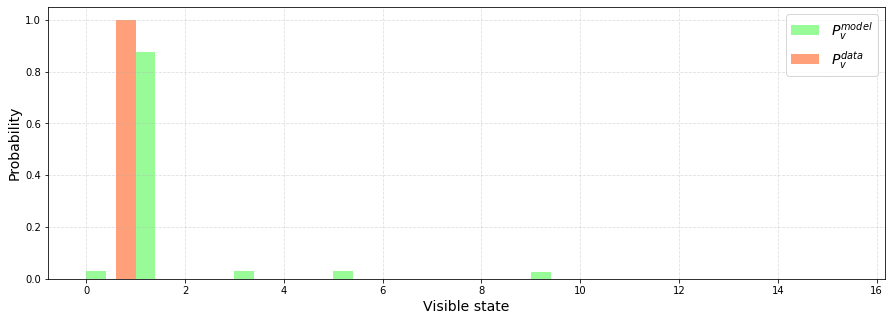

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1]))]
Model dist: {(1, 1, 1, 1): (0.029142889347367064+0j), (1, 1, 1, -1): (0.5921979267210249+0j), (1, 1, -1, 1): (0.0024295616938111828+0j), (1, 1, -1, -1): (0.04678306062473927+0j), (1, -1, 1, 1): (0.0024157085700346353+0j), (1, -1, 1, -1): (0.04663519875397578+0j), (1, -1, -1, 1): (0.0019168623684381906+0j), (1, -1, -1, -1): (0.025715308749688928+0j), (-1, 1, 1, 1): (0.002494086221432063+0j), (-1, 1, 1, -1): (0.047596516017241+0j), (-1, 1, -1, 1): (0.0014442616554895035+0j), (-1, 1, -1, -1): (0.01923425951130235+0j), (-1, -1, 1, 1): (0.0013358102815091725+0j), (-1, -1, 1, -1): (0.017886720086406474+0j), (-1, -1, -1, 1): (0.012710601721041536+0j), (-1, -1, -1, -1): (0.15006122767649815+0j)}
Data dist: {(1.0, 1.0, 1.0, -1.0): 0.7445699143624844, (-1.0, -1.0, -1.0, -1.0): 0.25543008563751546}
Coreset: [(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1]))]


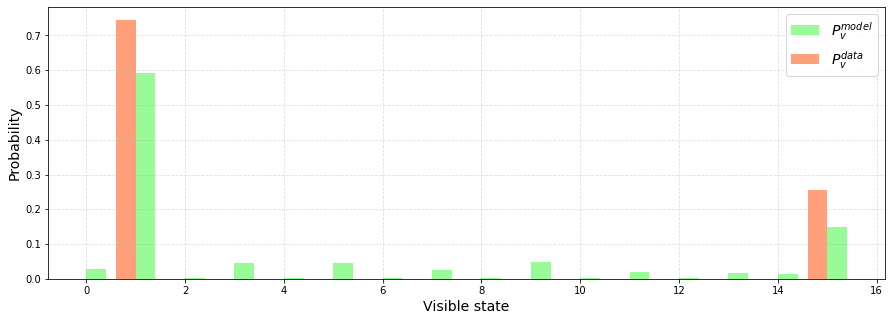

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0]))]
Model dist: {(1, 1, 1, 1): (0.02608587171518633+0j), (1, 1, 1, -1): (0.47637859316092124+0j), (1, 1, -1, 1): (0.0033569937734602828+0j), (1, 1, -1, -1): (0.05325253797395824+0j), (1, -1, 1, 1): (0.008742101677658022+0j), (1, -1, 1, -1): (0.044126735570316974+0j), (1, -1, -1, 1): (0.005316493598465208+0j), (1, -1, -1, -1): (0.010709884931648038+0j), (-1, 1, 1, 1): (0.00902380532490642+0j), (-1, 1, 1, -1): (0.04481035762280483+0j), (-1, 1, -1, 1): (0.0059439807100720955+0j), (-1, 1, -1, -1): (0.012599694213446068+0j), (-1, -1, 1, 1): (0.09068871322853429+0j), (-1, -1, 1, -1): (0.060986461333987455+0j), (-1, -1, -1, 1): (0.08783924075806414+0j), (-1, -1, -1, -1): (0.06013853440657063+0j)}
Data dist: {(1.0, 1.0, 1.0, -1.0): 0.607623865817921, (-1.0, -1.0, -1.0, -1.0): 0.20844975480127978, (-1.0, -1.0, 1.0, 1.0): 0.18392637938079914}
Coreset: [(103.57427701861384, 

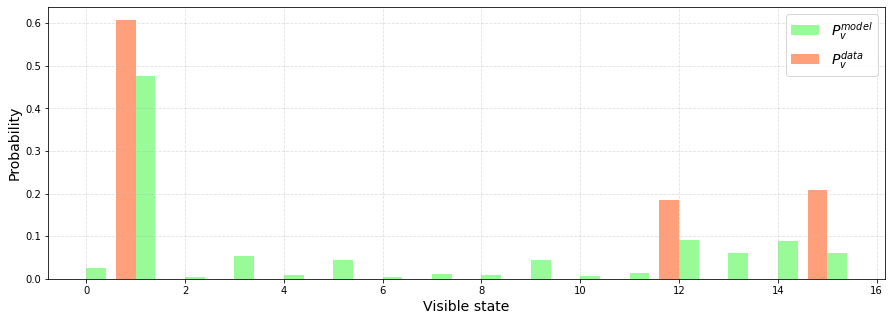

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1]))]
Model dist: {(1, 1, 1, 1): (0.026674956170533847+0j), (1, 1, 1, -1): (0.3897212819588559+0j), (1, 1, -1, 1): (0.005097632590640583+0j), (1, 1, -1, -1): (0.06632899965279333+0j), (1, -1, 1, 1): (0.005540951748630285+0j), (1, -1, 1, -1): (0.03176797614390972+0j), (1, -1, -1, 1): (0.00433487544384949+0j), (1, -1, -1, -1): (0.014642012061445314+0j), (-1, 1, 1, 1): (0.010919648929553254+0j), (-1, 1, 1, -1): (0.06506197972460358+0j), (-1, 1, -1, 1): (0.01654588786304593+0j), (-1, 1, -1, -1): (0.08066309271375709+0j), (-1, -1, 1, 1): (0.03983313872620101+0j), (-1, -1, 1, -1): (0.04483274890242873+0j), (-1, -1, -1, 1): (0.07255185706306323+0j), (-1, -1, -1, -1): (0.12548296030668882+0j)}
Data dist: {(1.0, 1.0, 1.0, -1.0): 0.5172213381953833, (-1.0, -1.0, -1.0, -1.0): 0.17743651490661644, (-1.0, -1.0, 1.0, 1.0): 0.1565617373253

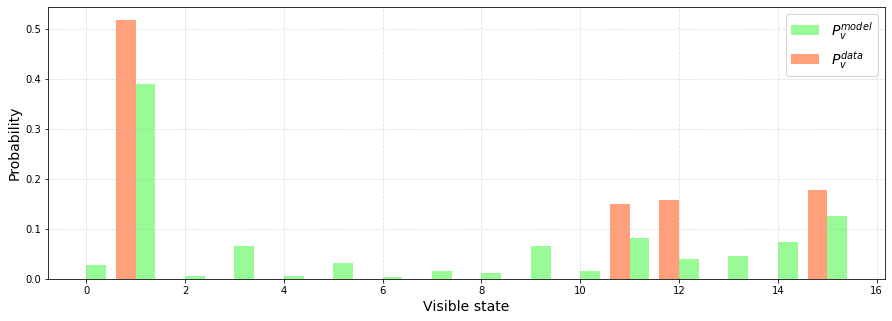

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0]))]
Model dist: {(1, 1, 1, 1): (0.02241739452248183+0j), (1, 1, 1, -1): (0.3508055265795759+0j), (1, 1, -1, 1): (0.005100967490161515+0j), (1, 1, -1, -1): (0.060558514264177604+0j), (1, -1, 1, 1): (0.006106244515534722+0j), (1, -1, 1, -1): (0.027044362550397195+0j), (1, -1, -1, 1): (0.007838077303707305+0j), (1, -1, -1, -1): (0.013242870567102279+0j), (-1, 1, 1, 1): (0.010530692046875498+0j), (-1, 1, 1, -1): (0.05209523315850377+0j), (-1, 1, -1, 1): (0.021474603864091238+0j), (-1, 1, -1, -1): (0.06115172069203526+0j), (-1, -1, 1, 1): (0.056921716833122825+0j), (-1, -1, 1, -1): (0.039162266209726605+0j), (-1, -1, -1, 1): (0.1459645390557793+0j), (-1, -1, -1, -1): (0.11958527034672727+0j)}
Data dist: {(1.0, 1.0, 1.0, -1.0): 0.4596919688111547, (-1.0, -1.0, -1.0, -1.0): 0.157700649321

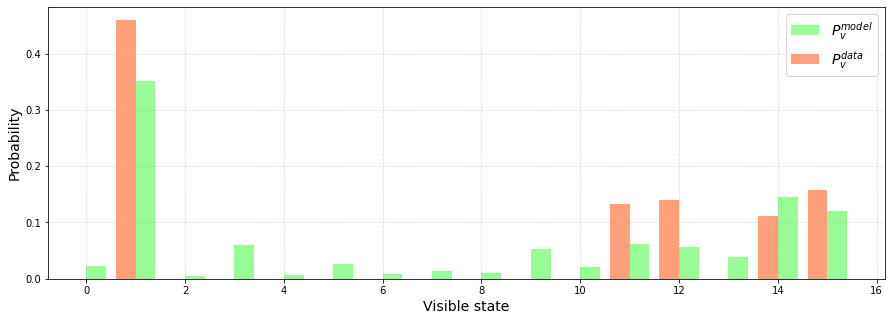

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0]))]
Model dist: {(1, 1, 1, 1): (0.07497463740609724+0j), (1, 1, 1, -1): (0.28782189449731255+0j), (1, 1, -1, 1): (0.02434730285684667+0j), (1, 1, -1, -1): (0.08229902177571649+0j), (1, -1, 1, 1): (0.03774184395365245+0j), (1, -1, 1, -1): (0.04379467839527639+0j), (1, -1, -1, 1): (0.022588968889978238+0j), (1, -1, -1, -1): (0.017698330130588757+0j), (-1, 1, 1, 1): (0.04762168179626654+0j), (-1, 1, 1, -1): (0.07886889001703153+0j), (-1, 1, -1, 1): (0.028829270477201185+0j), (-1, 1, -1, -1): (0.03338738644197164+0j), (-1, -1, 1, 1): (0.07948442139161703+0j), (-1, -1, 1, -1): (0.026703581051381573+0j), (-1, -1, -1, 1): (0.09119198785057538+0j), (-1, -1, -1, -1): (0.022646103068486266+0j)}
Data dist: {(1.0, 1.0, 1.0, -1.0): 0.3839023920153278, (

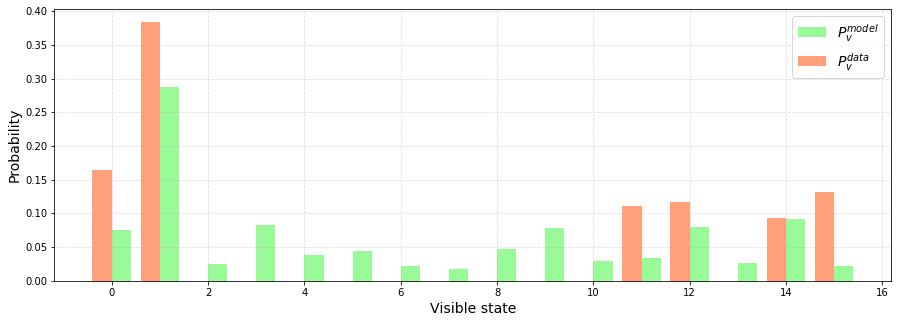

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0]))]
Model dist: {(1, 1, 1, 1): (0.12779475412494035+0j), (1, 1, 1, -1): (0.31262185027258127+0j), (1, 1, -1, 1): (0.015290327672002078+0j), (1, 1, -1, -1): (0.04178008702140533+0j), (1, -1, 1, 1): (0.01887255918880549+0j), (1, -1, 1, -1): (0.024449487216532034+0j), (1, -1, -1, 1): (0.011280648238553358+0j), (1, -1, -1, -1): (0.012674120578510658+0j), (-1, 1, 1, 1): (0.021494230486590285+0j), (-1, 1, 1, -1): (0.04319099561305753+0j), (-1, 1, -1, 1): (0.024125589279125642+0j), (-1, 1, -1, -1): (0.04629458187430777+0j), (-1, -1, 1, 1): (0.04117309811503438+0j), (-1, -1, 1, -1): (0.03098289544017715+0j), (-1, -1, -1, 1): (0.11537931851993097+0j), (-1, -1, -1, -1): (0.11259545635844571+0j)}
Data dist: {(1.0, 1.0, 1.0, -1.0): 0.3839023920153278, 

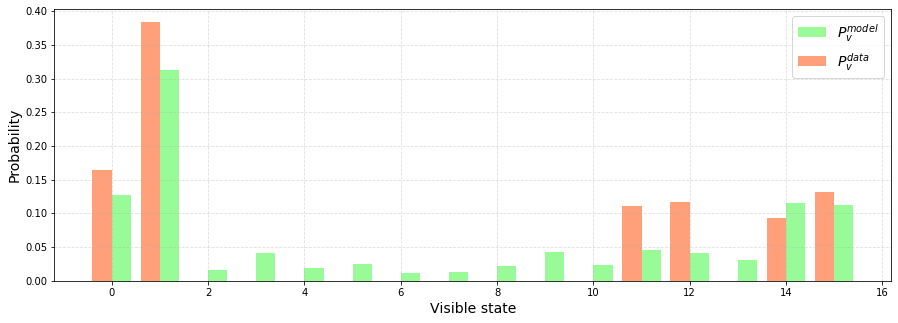

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1]))]
Model dist: {(1, 1, 1, 1): (0.11775029253754601+0j), (1, 1, 1, -1): (0.29000626639156446+0j), (1, 1, -1, 1): (0.010388541626967136+0j), (1, 1, -1, -1): (0.04334623490403376+0j), (1, -1, 1, 1): (0.02517770687377422+0j), (1, -1, 1, -1): (0.02471818855690882+0j), (1, -1, -1, 1): (0.007642473139616428+0j), (1, -1, -1, -1): (0.012201411205953007+0j), (-1, 1, 1, 1): (0.024185324215087105+0j), (-1, 1, 1, -1): (0.047943362599610934+0j), (-1, 1, -1, 1): (0.01566402369991154+0j), (-1, 1, -1, -1): (0.05718355170622814+0j), (-1, -1, 1, 1): (0.06858532353396979+0j), (-1, -1, 1, -1): (0.04397379331005095+0j), (-1, -1, -1, 1): (0.08833314336652638+0j), (-1, -1, -1, -1): (0.12290036233225123+0j)}
Data dist: {(1

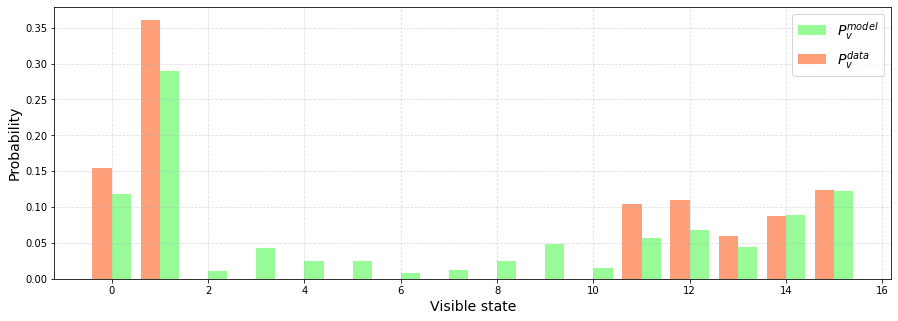

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1]))]
Model dist: {(1, 1, 1, 1): (0.13386637883469418+0j), (1, 1, 1, -1): (0.2744561528641348+0j), (1, 1, -1, 1): (0.01816064622655203+0j), (1, 1, -1, -1): (0.03948640957351959+0j), (1, -1, 1, 1): (0.020524436104544+0j), (1, -1, 1, -1): (0.03826466228773215+0j), (1, -1, -1, 1): (0.013203426108114315+0j), (1, -1, -1, -1): (0.024893398470122615+0j), (-1, 1, 1, 1): (0.019149953213753693+0j), (-1, 1, 1, -1): (0.036138346640168906+0j), (-1, 1, -1, 1): (0.016411932855736538+0j), (-1, 1, -1, -1): (0.03137499654286543+0j), (-1, -1, 1, 1): (0.028076790425989054+0j), (-1, -1, 1, -1): (0.04715342575195248+0j), (-1, -1, -1, 1): (0.09176089205407897+0j), (-1, -1, -1, -1):

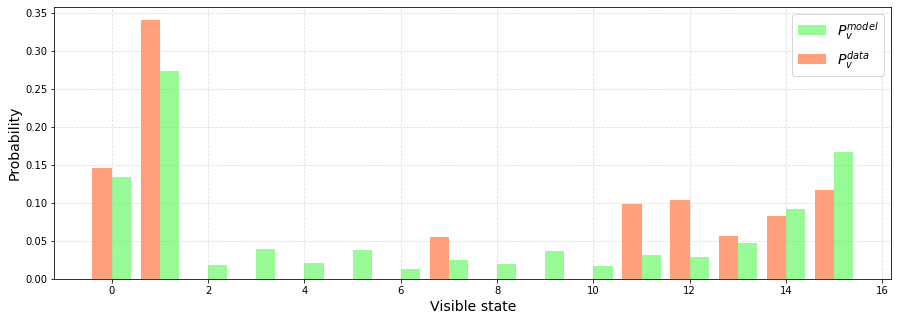

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1]))]
Model dist: {(1, 1, 1, 1): (0.11156701999566147+0j), (1, 1, 1, -1): (0.26008740961833976+0j), (1, 1, -1, 1): (0.020278610486666942+0j), (1, 1, -1, -1): (0.04646119840989455+0j), (1, -1, 1, 1): (0.021898730561982768+0j), (1, -1, 1, -1): (0.04691223402432973+0j), (1, -1, -1, 1): (0.011992102171699817+0j), (1, -1, -1, -1): (0.02289239244707065+0j), (-1, 1, 1, 1): (0.02329105116431248+0j), (-1, 1, 1, -1): (0.04907881133313015+0j), (-1, 1, -1, 1): (0.021775702315471154+0j), (-1, 1, -1, -1): (0.04101742422764436+0j), (-1, -1, 1, 1): (0.035637583719784614+0j), (-1, -1, 1, -1): (0.06259608732673491+0j), (-1, -1, -1, 1): 

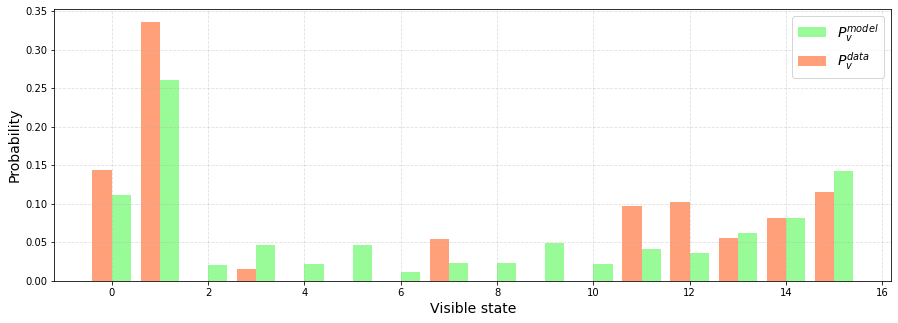

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1])), (5.306554507578051, array([0, 1, 0, 1]))]
Model dist: {(1, 1, 1, 1): (0.10239442581924275+0j), (1, 1, 1, -1): (0.28361230685495303+0j), (1, 1, -1, 1): (0.021191805626978116+0j), (1, 1, -1, -1): (0.05432171995778451+0j), (1, -1, 1, 1): (0.01848470140261551+0j), (1, -1, 1, -1): (0.04269132792609062+0j), (1, -1, -1, 1): (0.011335454332245355+0j), (1, -1, -1, -1): (0.01884688306353984+0j), (-1, 1, 1, 1): (0.020392338334890545+0j), (-1, 1, 1, -1): (0.041644586467719444+0j), (-1, 1, -1, 1): (0.019376078022187077+0j), (-1, 1, -1, -1): (0.028401137410471736+0j), (-1, -1, 1, 1): (0.043824787032190296+0j), (-1, -1, 1, -1):

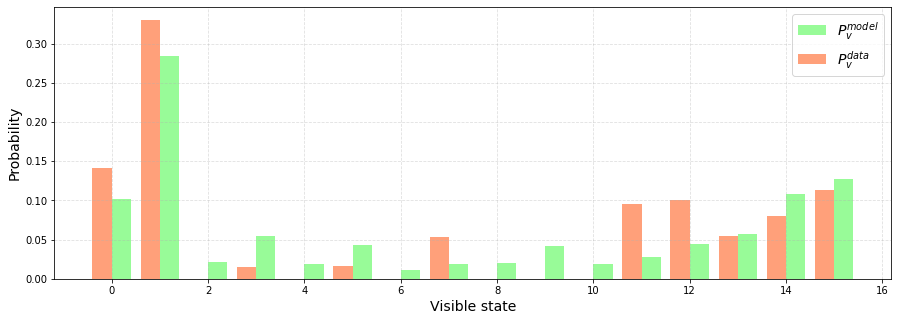

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1])), (5.306554507578051, array([0, 1, 0, 1])), (4.363427945425857, array([0, 0, 1, 0]))]
Model dist: {(1, 1, 1, 1): (0.11431995290219779+0j), (1, 1, 1, -1): (0.28814652276001096+0j), (1, 1, -1, 1): (0.01776046852221454+0j), (1, 1, -1, -1): (0.04598081264731144+0j), (1, -1, 1, 1): (0.018952470843122723+0j), (1, -1, 1, -1): (0.032951186746566906+0j), (1, -1, -1, 1): (0.016480976423299674+0j), (1, -1, -1, -1): (0.026265404567718382+0j), (-1, 1, 1, 1): (0.0210853809177842+0j), (-1, 1, 1, -1): (0.050504497436457546+0j), (-1, 1, -1, 1): (0.014380468180023786+0j), (-1, 1, -1, -1): (0.03216652816032352+0j), (-1, -1, 1, 1): (0

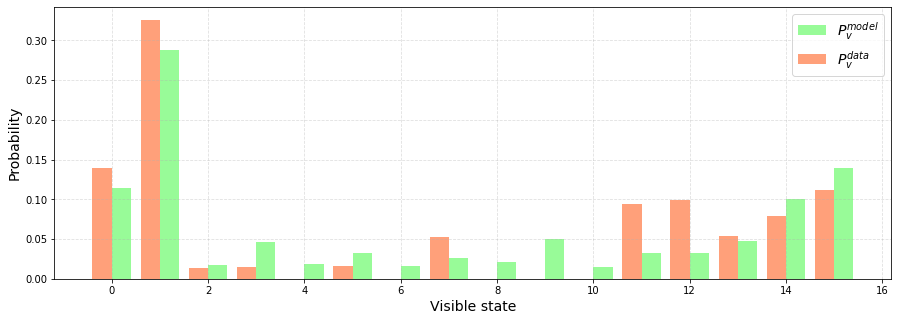

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1])), (5.306554507578051, array([0, 1, 0, 1])), (4.363427945425857, array([0, 0, 1, 0]))]
Model dist: {(1, 1, 1, 1): (0.11209966878472669+0j), (1, 1, 1, -1): (0.27204181962476115+0j), (1, 1, -1, 1): (0.024986774784804267+0j), (1, 1, -1, -1): (0.05994846850387813+0j), (1, -1, 1, 1): (0.018479905256540474+0j), (1, -1, 1, -1): (0.03999511159938743+0j), (1, -1, -1, 1): (0.013666386116163932+0j), (1, -1, -1, -1): (0.02648001447847975+0j), (-1, 1, 1, 1): (0.0199889560072164+0j), (-1, 1, 1, -1): (0.04593328826726496+0j), (-1, 1, -1, 1): (0.01175904839179718+0j), (-1, 1, -1, -1): (0.024527741287407985+0j), (-1, -1, 1, 1): (0.0

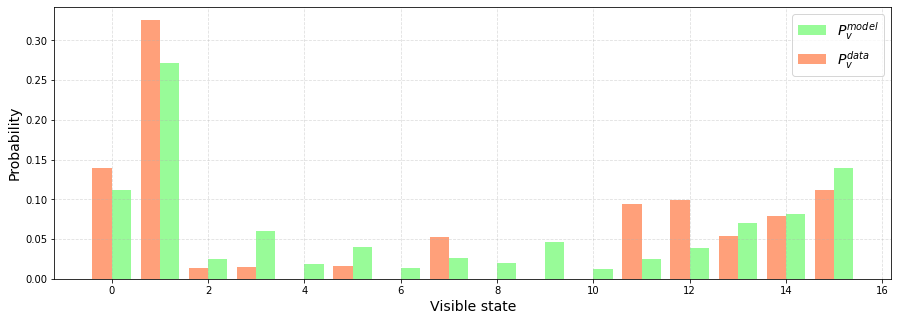

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1])), (5.306554507578051, array([0, 1, 0, 1])), (4.363427945425857, array([0, 0, 1, 0]))]
Model dist: {(1, 1, 1, 1): (0.10759741808049117+0j), (1, 1, 1, -1): (0.28981124295609273+0j), (1, 1, -1, 1): (0.0177604361759221+0j), (1, 1, -1, -1): (0.04251768563278286+0j), (1, -1, 1, 1): (0.017842748899686695+0j), (1, -1, 1, -1): (0.03832148422379565+0j), (1, -1, -1, 1): (0.017849408377518434+0j), (1, -1, -1, -1): (0.027696031773292613+0j), (-1, 1, 1, 1): (0.021080764362172037+0j), (-1, 1, 1, -1): (0.047670351032944674+0j), (-1, 1, -1, 1): (0.016329069414586766+0j), (-1, 1, -1, -1): (0.026718933491414198+0j), (-1, -1, 1, 1): (

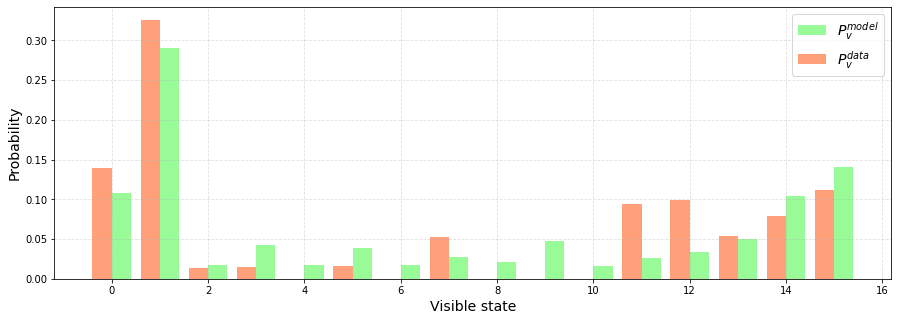

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1])), (5.306554507578051, array([0, 1, 0, 1])), (4.363427945425857, array([0, 0, 1, 0]))]
Model dist: {(1, 1, 1, 1): (0.10712013543810628+0j), (1, 1, 1, -1): (0.2807237454141403+0j), (1, 1, -1, 1): (0.0231826574896983+0j), (1, 1, -1, -1): (0.05298737779602919+0j), (1, -1, 1, 1): (0.018320827679361527+0j), (1, -1, 1, -1): (0.03897650556706282+0j), (1, -1, -1, 1): (0.01874685649762838+0j), (1, -1, -1, -1): (0.02610570757142311+0j), (-1, 1, 1, 1): (0.021058276422095873+0j), (-1, 1, 1, -1): (0.048115974746358904+0j), (-1, 1, -1, 1): (0.01558942501181115+0j), (-1, 1, -1, -1): (0.023878331787684084+0j), (-1, -1, 1, 1): (0.03

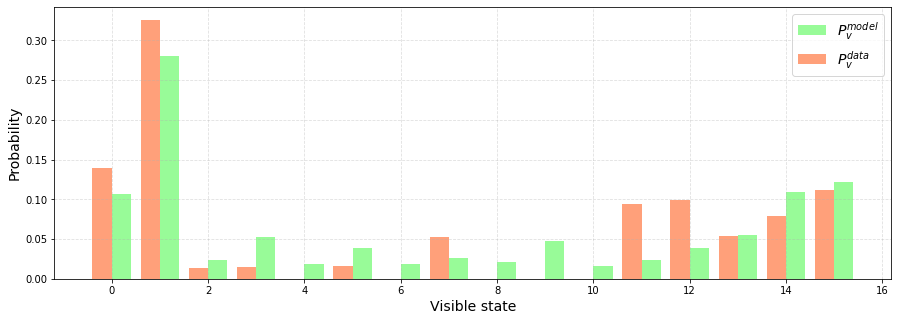

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1])), (5.306554507578051, array([0, 1, 0, 1])), (4.363427945425857, array([0, 0, 1, 0]))]
Model dist: {(1, 1, 1, 1): (0.1255918314263397+0j), (1, 1, 1, -1): (0.26327386440239064+0j), (1, 1, -1, 1): (0.014342178739313023+0j), (1, 1, -1, -1): (0.03161951876182031+0j), (1, -1, 1, 1): (0.02968861893765979+0j), (1, -1, 1, -1): (0.05846906248965869+0j), (1, -1, -1, 1): (0.012379500088509956+0j), (1, -1, -1, -1): (0.024864152403727198+0j), (-1, 1, 1, 1): (0.024356055737882992+0j), (-1, 1, 1, -1): (0.04709277287576455+0j), (-1, 1, -1, 1): (0.02337471038617522+0j), (-1, 1, -1, -1): (0.04692836429982996+0j), (-1, -1, 1, 1): (0.0

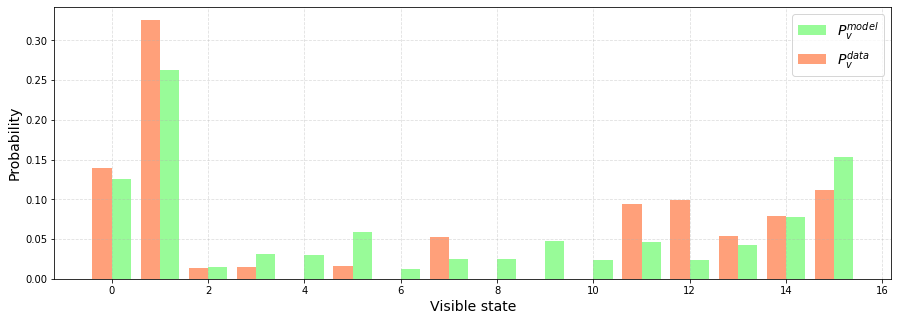

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1])), (5.306554507578051, array([0, 1, 0, 1])), (4.363427945425857, array([0, 0, 1, 0]))]
Model dist: {(1, 1, 1, 1): (0.10607069135143465+0j), (1, 1, 1, -1): (0.2780161030697037+0j), (1, 1, -1, 1): (0.023123375425299218+0j), (1, 1, -1, -1): (0.05539709795261403+0j), (1, -1, 1, 1): (0.019861071461731914+0j), (1, -1, 1, -1): (0.04253495257572788+0j), (1, -1, -1, 1): (0.0138514947110782+0j), (1, -1, -1, -1): (0.020749995151732925+0j), (-1, 1, 1, 1): (0.020435359736903143+0j), (-1, 1, 1, -1): (0.042022857257362566+0j), (-1, 1, -1, 1): (0.01745057581345694+0j), (-1, 1, -1, -1): (0.025038823327428267+0j), (-1, -1, 1, 1): (0.

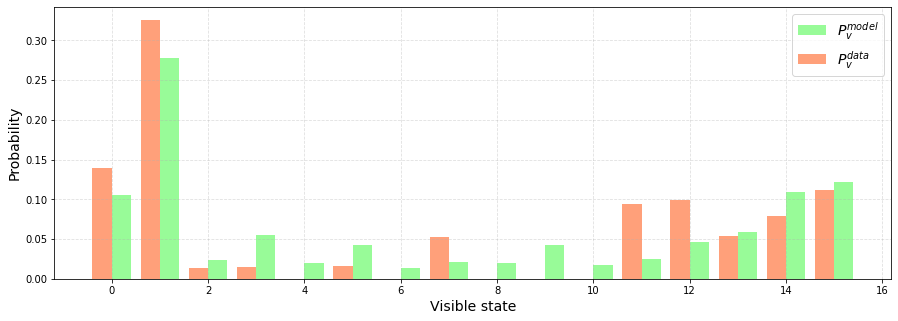

[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1])), (5.306554507578051, array([0, 1, 0, 1])), (4.363427945425857, array([0, 0, 1, 0]))]
Model dist: {(1, 1, 1, 1): (0.10246633317747415+0j), (1, 1, 1, -1): (0.2846307673373157+0j), (1, 1, -1, 1): (0.021400463571468735+0j), (1, 1, -1, -1): (0.052670877191008006+0j), (1, -1, 1, 1): (0.01822536694340035+0j), (1, -1, 1, -1): (0.04180096439877576+0j), (1, -1, -1, 1): (0.014053619830033039+0j), (1, -1, -1, -1): (0.022096812639491127+0j), (-1, 1, 1, 1): (0.021205965136759528+0j), (-1, 1, 1, -1): (0.04386742880429208+0j), (-1, 1, -1, 1): (0.01919849009928716+0j), (-1, 1, -1, -1): (0.026709131945391214+0j), (-1, -1, 1, 1): (0

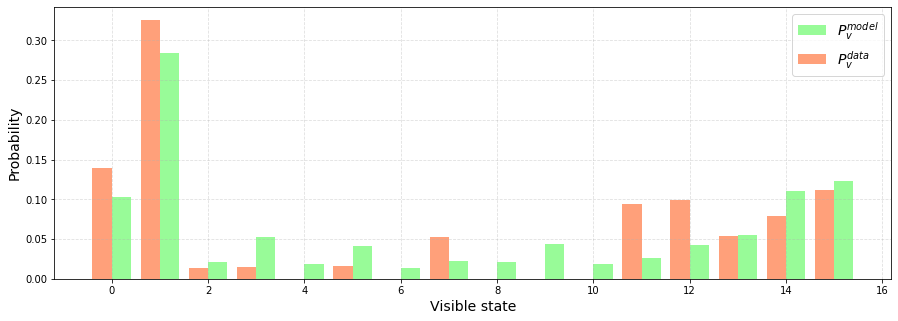

In [20]:
A = GIGACoreset(list(dataset), RQBM_loglikelihood)
B = RQBM(G, visible, hidden, beta)

final_model, coreset = bayesian_inference(list(dataset), make_model, 0, 16, A, B, 20)

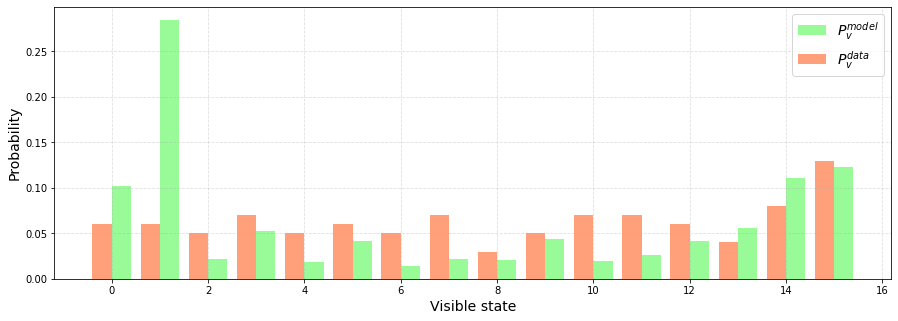

In [21]:
data_dict = {}
for pt in dataset:
    z_pt = tuple(-2 * pt + np.ones(pt.shape[0]))
    if z_pt in data_dict:
        data_dict[z_pt] += 1
    else:
        data_dict[z_pt] = 1
data_dist = {k: v / sum(data_dict.values()) for k, v in data_dict.items()}

model_dist = B.rqbm.get_distribution(B.beta)
B.rqbm.plot_dist(model_dist, data_dist)


[(103.57427701861384, array([0, 0, 0, 1])), (35.53190363776708, array([1, 1, 1, 1])), (31.35170101222792, array([1, 1, 0, 0])), (29.79347953777678, array([1, 0, 1, 1])), (25.06098716131669, array([1, 1, 1, 0])), (44.48090943121892, array([0, 0, 0, 0])), (17.23858156481481, array([1, 1, 0, 1])), (16.616841929949015, array([0, 1, 1, 1])), (4.66864455805534, array([0, 0, 1, 1])), (5.306554507578051, array([0, 1, 0, 1])), (4.363427945425857, array([0, 0, 1, 0])), (2.743255438173382, array([1, 0, 0, 1]))]


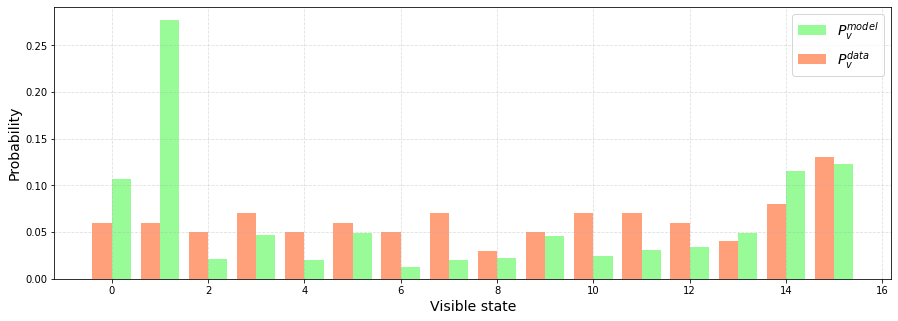

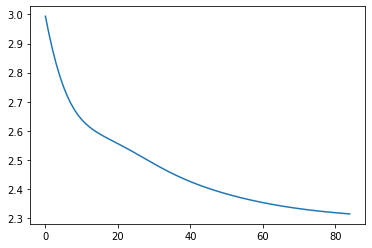

In [30]:
coreset_qbm = QuantumBoltzmannMachine(G, visible, hidden, 2)
coreset_qbm.exact_train_coreset(coreset, beta=B.beta)
coreset_model_dist = coreset_qbm.get_distribution(beta=B.beta)
coreset_qbm.plot_dist(coreset_model_dist, data_dist)
plot_loss_history(coreset_qbm.loss_history)

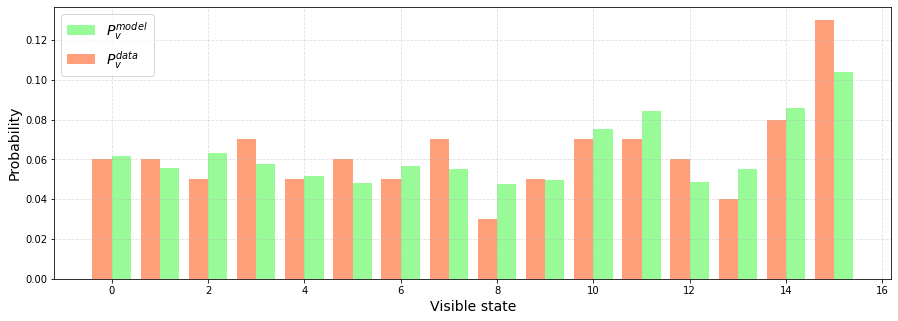

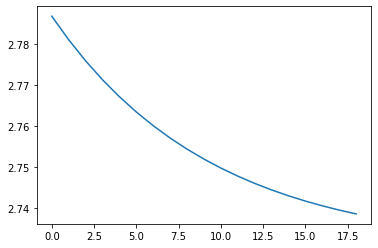

In [31]:
optimal_qbm = QuantumBoltzmannMachine(G, visible, hidden, 2)
optimal_qbm.exact_optimization(data_dist, beta=1)
optimal_model_dist = optimal_qbm.get_distribution(beta=1)
optimal_qbm.plot_dist(optimal_model_dist, data_dist)
plot_loss_history(optimal_qbm.loss_history)

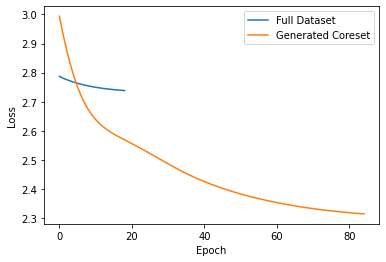

In [32]:
plt.plot(optimal_qbm.loss_history, label='Full Dataset')
plt.plot(coreset_qbm.loss_history, label='Generated Coreset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()